# Assignment2
### Hengchao Wang  1001778272

In [1]:
from csv import reader
from math import sqrt
import random
import operator
import matplotlib.pyplot as plt

In [2]:
# variable
filename = "iris_data"
splitRow = 0.8
K = 5
distanceMethod = 1

## Divide the dataset as development and test. 

In [3]:
def str_column_to_float(dataset):
    for i in range(len(dataset[0]) - 1):
        for row in dataset:
            row[i] = float(row[i].strip())

# load csv files into a list. parameters: start row end row and which row is classRow
def load_csv(filename, start = 0, end = -1, classRow = -1):
    dataset = list()
    filename = filename + ".csv"
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            if end == -1:
                if classRow != -1: 
                    tmp = row[classRow]
                    row[classRow] = row[-1]
                    row[-1] = tmp
                dataset.append(row[start:])
            else :
                if classRow != -1: 
                    tmp = row[classRow]
                    row[classRow] = row[-1]
                    row[-1] = tmp
                dataset.append(row[start:end])
    str_column_to_float(dataset)
    return dataset

In [4]:
dataset = load_csv(filename)
len(dataset)

150

In [5]:
def saperateDataset(dataset, splitRate):
    developmentSet = list()
    testSet = list()
    for x in range(len(dataset)-1):
        for y in range(4):
            dataset[x][y] = float(dataset[x][y])
        if random.random() < splitRate:  
            developmentSet.append(dataset[x])
        else:
            testSet.append(dataset[x])
    print("developmentSet length:", len(developmentSet), "testSet length:",  len(testSet))
    return developmentSet,testSet

developmentSet,testSet = saperateDataset(dataset, splitRow)
type(developmentSet[1][1])

developmentSet length: 124 testSet length: 25


float

## Distance metric

In [6]:
def euclideanDistance(a,b):  #euclidean
    sum = 0
    for i in range(len(a)-1):
        sum += (a[i]-b[i])**2
    return sqrt(sum)

def normalizedEuclideanDistance(a,b):   #normalized euclidean
    sumnum = 0
    for i in range(len(a)-1):
        avg = (a[i]-b[i])/2
        si = sqrt( (a[i] - avg) ** 2 + (b[i] - avg) ** 2 )
        sumnum += ((a[i]-b[i])/si ) ** 2
    return sqrt(sumnum)

def cosineSimilarity(a,b):   #cosine similarity
    sum_fenzi = 0.0
    sum_fenmu_1,sum_fenmu_2 = 0,0
    for i in range(len(a)-1):
        sum_fenzi += a[i]*b[i]
        sum_fenmu_1 += a[i]**2 
        sum_fenmu_2 += b[i]**2 
        
    return sum_fenzi/( sqrt(sum_fenmu_1) * sqrt(sum_fenmu_2) )

In [7]:
def distanceTest():
    print( 'a,b euclidean distance：',euclideanDistance((1,2,1,2),(3,3,3,4)))
    print( 'a,b normalized euclidean distance：',normalizedEuclideanDistance((1,2,1,2),(3,3,3,4)))
    print( 'a,b cosine similarity：',cosineSimilarity((1,2,1,2),(3,3,3,4)))
    
distanceTest()

a,b euclidean distance： 3.0
a,b normalized euclidean distance： 0.6738353315566452
a,b cosine similarity： 0.9428090415820634


## Implement KNN

In [8]:
def getNeighbors(developmentSet, instance, k, distanceMethod):  # choose distance method. 
    distances = list()
    for x in range(len(developmentSet)):
#         print(developmentSet[x], instance)
        if operator.eq(developmentSet[x],instance): 
            continue
        else:
            if distanceMethod == 1:    #1 == euclideanDistance
                dist = euclideanDistance(instance, developmentSet[x])
            elif distanceMethod == 2:   #2 == normalizedEuclideanDistance
                dist = normalizedEuclideanDistance(instance, developmentSet[x])
            elif distanceMethod == 3:   #3 == cosineSimilarity
                dist = cosineSimilarity(instance, developmentSet[x])
            distances.append((developmentSet[x], dist))   
    distances.sort(key=operator.itemgetter(1)) 
    sorted(distances,key=lambda x: x[0])   #sorted by 
    neighbors = list()
    if distanceMethod == 1 or distanceMethod == 2:   
        for x in range(k):   
            neighbors.append(distances[x][0])
    else: 
        for x in range(len(distances)-k, len(distances)):   # cosineSimilarity need to get the top k biggest
            neighbors.append(distances[x][0])
    return neighbors

In [9]:
def getPrediction(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]  

In [10]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet)))*100.0

In [11]:
# test of KNN
neighbors = getNeighbors(developmentSet, developmentSet[1], K, 3)   #test
getPrediction(neighbors)

'Iris-setosa'

In [12]:
def getAllPrediction(developmentSet, k, distanceMethod):
    predictions = []
    for instance in developmentSet:
        neighbors = getNeighbors(developmentSet, instance, k, distanceMethod)
        predictions.append(getPrediction(neighbors))
#     print(predictions)
    accuracy = getAccuracy(developmentSet, predictions)
    if distanceMethod == 1:
        method = "EuclideanDistance"
    elif distanceMethod == 2:
        method = "normalizedEuclideanDistance"
    elif distanceMethod == 3:
        method = "cosineSimilarity"
    
    print("k = ", k, " distanceMethod = ", method , "accuracy = ",accuracy)
    return accuracy

In [13]:
def compare(data):  
    for distanceMethod in [1,2,3]:
        for K in [1,3,5,7]:
            getAllPrediction(data, K, distanceMethod)
    
compare(developmentSet)

k =  1  distanceMethod =  EuclideanDistance accuracy =  95.96774193548387
k =  3  distanceMethod =  EuclideanDistance accuracy =  95.96774193548387
k =  5  distanceMethod =  EuclideanDistance accuracy =  96.7741935483871
k =  7  distanceMethod =  EuclideanDistance accuracy =  96.7741935483871
k =  1  distanceMethod =  normalizedEuclideanDistance accuracy =  94.35483870967742
k =  3  distanceMethod =  normalizedEuclideanDistance accuracy =  95.96774193548387
k =  5  distanceMethod =  normalizedEuclideanDistance accuracy =  95.16129032258065
k =  7  distanceMethod =  normalizedEuclideanDistance accuracy =  95.96774193548387
k =  1  distanceMethod =  cosineSimilarity accuracy =  95.96774193548387
k =  3  distanceMethod =  cosineSimilarity accuracy =  97.58064516129032
k =  5  distanceMethod =  cosineSimilarity accuracy =  98.38709677419355
k =  7  distanceMethod =  cosineSimilarity accuracy =  97.58064516129032


k =  1  distanceMethod =  EuclideanDistance accuracy =  95.96774193548387
k =  2  distanceMethod =  EuclideanDistance accuracy =  95.96774193548387
k =  3  distanceMethod =  EuclideanDistance accuracy =  95.96774193548387
k =  4  distanceMethod =  EuclideanDistance accuracy =  95.96774193548387
k =  5  distanceMethod =  EuclideanDistance accuracy =  96.7741935483871
k =  6  distanceMethod =  EuclideanDistance accuracy =  95.96774193548387
k =  7  distanceMethod =  EuclideanDistance accuracy =  96.7741935483871
k =  8  distanceMethod =  EuclideanDistance accuracy =  95.16129032258065
k =  9  distanceMethod =  EuclideanDistance accuracy =  96.7741935483871
k =  10  distanceMethod =  EuclideanDistance accuracy =  96.7741935483871
k =  1  distanceMethod =  normalizedEuclideanDistance accuracy =  94.35483870967742
k =  2  distanceMethod =  normalizedEuclideanDistance accuracy =  94.35483870967742
k =  3  distanceMethod =  normalizedEuclideanDistance accuracy =  95.96774193548387
k =  4  dis

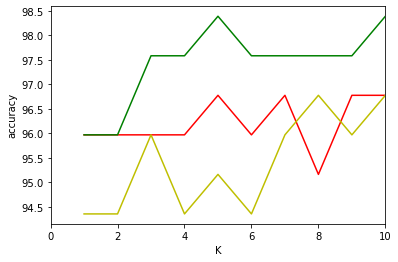

In [14]:
def plotRes(k, m1, m2, m3): # Draw bar charts for accuracy
    
    plt.xlim(0, 10)   
    plt.plot(k, m1,label = "$test error$", c = "r")
    plt.plot(k, m2,label = "$normalizedEuclideanDistance$", c = "y")
    plt.plot(k, m3,label = "$cosineSimilarity$", c = "g")
    plt.xlabel('K')
    plt.ylabel('accuracy')
    plt.show()
    

def findBest():      # Find optimal hyperparameters 
    maxAccuracy, bestK, bestM = 0, 0, 1
    m1 = list()
    m2 = list()
    m3 = list()
    k = [1,2,3,4,5,6,7,8,9,10]
    for K in k:
        acc = getAllPrediction(developmentSet, K, 1)
        m1.append(acc)
        if acc > maxAccuracy: maxAccuracy, bestK, bestM = acc, K, 1
    for K in k:
        acc = getAllPrediction(developmentSet, K, 2)
        m2.append(acc)
        if acc > maxAccuracy: maxAccuracy, bestK, bestM = acc, K, 2
    for K in k:
        acc = getAllPrediction(developmentSet, K, 3)
        m3.append(acc)
        if acc > maxAccuracy: maxAccuracy, bestK, bestM = acc, K, 3
    plotRes(k, m1, m2, m3)
    return maxAccuracy, bestK, bestM
    
maxAccuracy, bestK, bestM = findBest()

In [15]:
getAllPrediction(testSet, bestK, bestM)

k =  5  distanceMethod =  cosineSimilarity accuracy =  96.0


96.0